In [42]:
from collections import Counter
from pathlib import Path


from tqdm import tqdm
from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import torch
from collections import Counter
import torch.nn.functional as F
from torch import nn
from torch.autograd import Variable
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchvision.models import resnet18
from torchvision import transforms as T

from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors

from DeepCluster.cluster import cluster
from DeepCluster.visualize import *
from utils.dataset import CloudDataset

import pickle


In [43]:

transformer = T.Compose([
    T.Resize([256, 256]),
    # you can add other transformations in this list
    T.ToTensor(),
])

different_models = ['trained on 256 tiles', 'trained on max square', 'trained on zooniverse train'] 
interest = 0


batch_size = 8
PATH = "./model/"+str(different_models[interest])+"/model.ckpt"
root = "CLUSTERING_BIGGEST_SQUARE/train"
limit_images = 10000


In [44]:
pca = pickle.load(open("./model/"+str(different_models[interest])+"/pca.pkl", 'rb'))#IncrementalPCA(n_components=pca_dim, batch_size=512, whiten=True)
model = torch.load(PATH)
model.eval()
raw_dataset = CloudDataset(root=root, transforms=transformer, limit=limit_images)
kmeans =  pickle.load(open("./model/"+str(different_models[interest])+"/kmeans.pkl", 'rb')) #MiniBatchKMeans(n_clusters=kmeans_clusters, batch_size=512, init_size=3*kmeans_clusters)
#counts = Counter(pseudo_labels)


Number of cloud images : 4569


In [45]:
pseudo_labels, features = cluster(pca, kmeans, model, raw_dataset, batch_size, return_features=True)

extracting features: 100%|████████████████████████████████████████████████████████████| 572/572 [00:19<00:00, 29.08it/s]


In [46]:
counts = Counter(pseudo_labels)
print(counts)
print(len(pseudo_labels))
print(pseudo_labels[:10])

Counter({3: 1271, 7: 846, 1: 469, 4: 466, 11: 464, 8: 256, 9: 255, 0: 218, 6: 136, 5: 104, 10: 60, 2: 24})
4569
[4, 5, 3, 8, 3, 11, 3, 3, 1, 0]


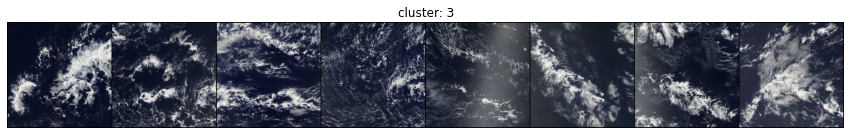

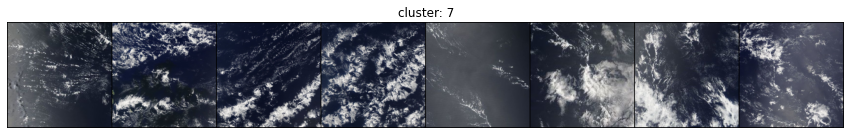

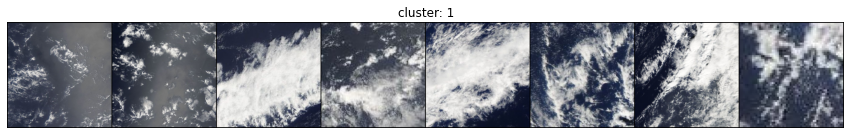

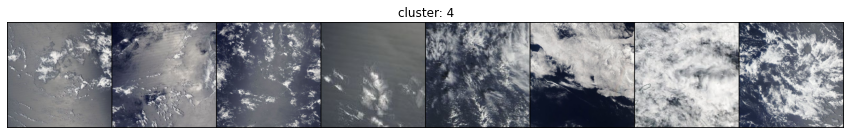

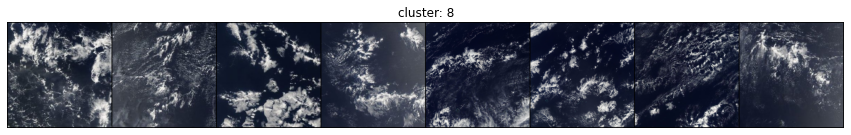

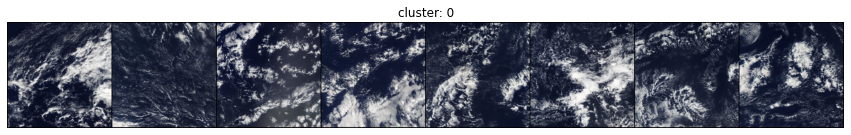

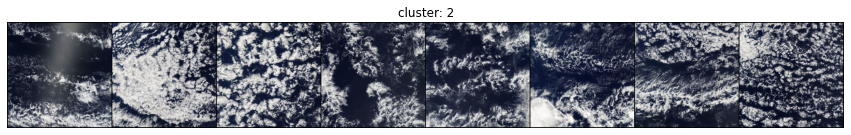

In [47]:
for rx in range(12):
    show_cluster(counts.most_common()[rx][0], pseudo_labels, raw_dataset, limit=8 )

In [48]:
show_grid(counts.most_common(), pseudo_labels, raw_dataset)

len images : 96
Type : <class 'torch.Tensor'>
